#                                        **PROJECT-1**

# **Predicting Customer Lifetime Value in E-commerce**

**Regression     :** 

**______________________________**

**6 : Predicting Customer Lifetime Value in E-commerce : Problem Statement: Predicting Customer Lifetime Value in E-commerce
Project Description: Develop a regression model to predict the lifetime value of customers in an e-commerce business based on their purchase history, browsing behavior, and demographic data.
Domain: E-commerce**

In [49]:

                                  ##### RETAIL DATASET #######



# Importing Libraries

#importing pandas library as pd
import pandas as pd

#importing numpy library as np
import numpy as np

#from matplotlib library importing pyplot as plt
import matplotlib.pyplot as plt

#importing seaborn library as sns
import seaborn as sns

#importing filterwarnings from warnings
import warnings
warnings.filterwarnings('ignore')

#loading the retail dataset
df = pd.read_csv("Retail.csv")
df

,product_id,qty,amount,stock_code
0,133,9,14.57,36239634
1,155,5,65.48,2820163
2,151,9,24.66,27006726
3,143,4,21.34,83036521
4,168,2,83.90,80142652
...,...,...,...,...
9995,133,1,39.82,53513212
9996,133,1,21.94,61754737
9997,173,2,62.05,17037907
9998,146,5,11.35,32764659


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  10000 non-null  int64  
 1   qty         10000 non-null  int64  
 2   amount      10000 non-null  float64
 3   stock_code  10000 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 312.6 KB


In [51]:
df.describe()

,product_id,qty,amount,stock_code
count,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,149.746700,5.005900,52.918236,4.950036e+07
std,28.728186,2.576767,27.434579,2.903081e+07
min,100.000000,1.000000,5.010000,1.977000e+03
25%,125.000000,3.000000,29.137500,2.425234e+07
50%,150.000000,5.000000,53.485000,4.931714e+07
75%,175.000000,7.000000,76.520000,7.457446e+07
max,199.000000,9.000000,99.990000,9.999216e+07


In [52]:
df.isna().sum()

product_id    0
qty           0
amount        0
stock_code    0
dtype: int64

In [53]:
df.columns

Index(['product_id', 'qty', 'amount', 'stock_code'], dtype='object')

In [54]:
df.head()

,product_id,qty,amount,stock_code
0,133,9,14.57,36239634
1,155,5,65.48,2820163
2,151,9,24.66,27006726
3,143,4,21.34,83036521
4,168,2,83.90,80142652


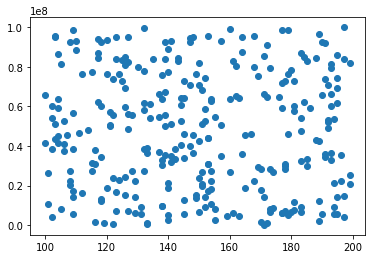

In [55]:
plt.scatter(df["product_id"][:300], df["stock_code"][:300])

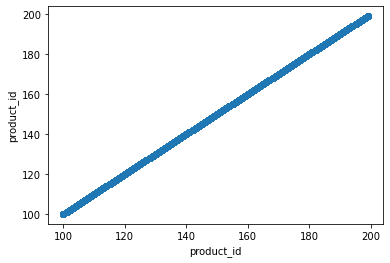

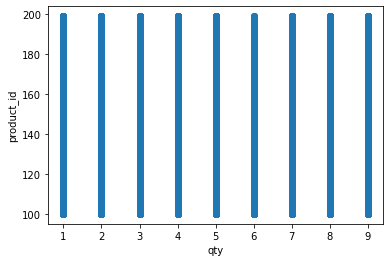

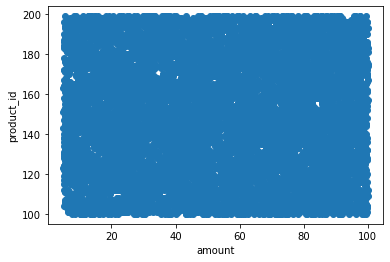

In [56]:
for i in df.columns[:-1]:
    plt.xlabel(i)
    plt.ylabel("product_id")
    plt.scatter(df[i],df["product_id"])
    plt.show()

In [59]:
x = np.array(df["qty"]).reshape(-1,1)
y = np.array(df["product_id"]).reshape(-1,1)

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
linear = LinearRegression()

In [62]:
linear.fit(x,y)

LinearRegression()

In [63]:
linear.predict([[34]])

array([[148.57714072]])

# Mulptiple Linear Regression

In [68]:
len(df.columns)

4

In [69]:
df.columns

Index(['product_id', 'qty', 'amount', 'stock_code'], dtype='object')

In [70]:
x = df.drop("stock_code",axis=1)
y = df["stock_code"]

In [71]:
x.head()

,product_id,qty,amount
0,133,9,14.57
1,155,5,65.48
2,151,9,24.66
3,143,4,21.34
4,168,2,83.90


In [72]:
y.head()

0    36239634
1     2820163
2    27006726
3    83036521
4    80142652
Name: stock_code, dtype: int64

In [73]:
model = LinearRegression()

In [74]:
import seaborn as sns
data = pd.read_csv("Retail.csv")
data

,product_id,qty,amount,stock_code
0,133,9,14.57,36239634
1,155,5,65.48,2820163
2,151,9,24.66,27006726
3,143,4,21.34,83036521
4,168,2,83.90,80142652
...,...,...,...,...
9995,133,1,39.82,53513212
9996,133,1,21.94,61754737
9997,173,2,62.05,17037907
9998,146,5,11.35,32764659


<AxesSubplot:xlabel='product_id', ylabel='qty'>

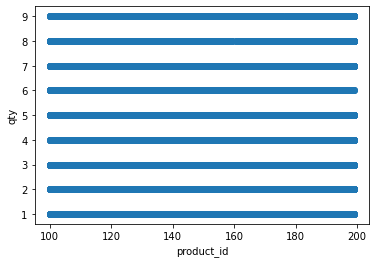

In [75]:
sns.regplot(x = "product_id",
            y = "qty",
            data = data)

**split the data into testing and training**

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
xtrain,xtest,ytrain,ytest = train_test_split(data.drop("product_id",axis=1),data["product_id"],train_size = .75)

In [78]:
xtrain.shape

(7500, 3)

In [79]:
ytrain.shape

(7500,)

In [80]:
xtest.shape

(2500, 3)

In [81]:
ytest.shape

(2500,)

In [82]:
model.fit(xtrain,ytrain)

LinearRegression()

In [86]:
y_pred = model.predict(xtest)

In [87]:
ytest.head(10)

4293    114
4928    124
4720    180
2643    118
8928    195
2816    167
4461    170
6692    196
3184    102
6268    132
Name: product_id, dtype: int64

In [88]:
xtest.head()

,qty,amount,stock_code
4293,2,61.44,76927041
4928,6,11.94,39250032
4720,6,49.23,6125516
2643,8,74.24,12497577
8928,9,31.36,38101755


In [89]:
for i in y_pred[:10]:
    print(i)


149.831258472644
149.87583562518284
150.46536731543412
150.0447732424075
149.4332524185414
150.1083065654105
149.03125421198064
150.17391195925717
150.18629999460674
150.37828010153984


In [90]:
model.score(xtrain, ytrain )

0.0005088203018285276

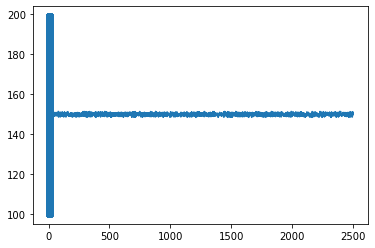

In [91]:
plt.scatter(xtest["qty"],ytest)
plt.plot(y_pred)

In [92]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error

In [93]:
mean_absolute_error(ytest, y_pred)

24.5610388581195

In [94]:
mean_squared_error(ytest, y_pred)

808.371469034115

In [95]:
model.score(xtrain,ytrain) #r2 score

0.0005088203018285276